## Extracting single trials for enhanced functional types classification
#Version 030223

(3, 140)


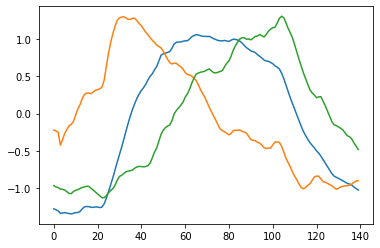

In [1]:
import h5py
import numpy as np
from pathlib import Path
import pylab as pl

data_path = Path("./")
container_functional_hdf5 = h5py.File(data_path / "functional_2019-10-29_15-12-39_all_data.hdf5", "r", libver='latest', swmr=True)
container_overview_hdf5 = h5py.File(data_path / "overview_2019-10-29_17-45-48_all_data.hdf5", "r", libver='latest', swmr=True)
regressors = np.load(data_path / "regressors_old.npy")

#regressors = np.load(data_path / "regressors.npy")
#No decay in themotor command, discarded 

print(regressors.shape)
pl.plot(regressors[0])
pl.plot(regressors[1])
pl.plot(regressors[2])
pl.show()

In [3]:
regressors.shape
np.savetxt(data_path / f"regressors_old.txt", regressors, delimiter='\t') 

In [3]:
container_functional_hdf5

<HDF5 file "functional_2019-10-29_15-12-39_all_data.hdf5" (mode None)>

### Increase classification cut-off corr to 0.8 with individual regressors

In [29]:
for z_plane in range(6):

    # Cells where segmented based on stardist with manal training 
    segmentation_hdf5 = container_functional_hdf5[f"{z_plane}/manual_segmentation"]

    region_mask_units_matrix_ants_registered = segmentation_hdf5["region_mask_units_matrix_ants_registered"]

    region_name_file = open(data_path / f"simple_format_functional_z_plane{z_plane}_region_names.txt", "w")

    for i in range(294):
        region_name_file.write(f"{i}" + "\t" + region_mask_units_matrix_ants_registered.attrs[f"{i}"] + "\n")

    print(region_mask_units_matrix_ants_registered.shape)

    number_of_units = segmentation_hdf5.attrs["number_of_units"]
    print(number_of_units)

    # This should be 0.5 (Upsampled from framerate during pre-processing)
    dt = segmentation_hdf5["stimulus_aligned_dynamics"].attrs["dt"]

    # The the x,y position of all cells
    unit_centroids = segmentation_hdf5["unit_centroids"]
    functional_z_plane = int(z_plane)

    # The functional plane was registered to the overview, so get the target plane
    target_z_plane = container_functional_hdf5[f"{z_plane}/planar_registration"].attrs["target_z_plane"]
    # And the shifted x,y coordinates
    unit_centroids_planar_registered = segmentation_hdf5["unit_centroids_planar_registered"]

    # The cells have also been registered to the z-brain, get those coordinates as well
    unit_centroids_ants_registered = segmentation_hdf5["unit_centroids_ants_registered"]
    unit_correlation_qualities = segmentation_hdf5["unit_correlation_qualities"]
    print(unit_correlation_qualities.shape)
    
    # The the raw extracted fluorescence, these are individual trial data
    F_left_dots = np.array(segmentation_hdf5["stimulus_aligned_dynamics/0/F"])
    F_right_dots = np.array(segmentation_hdf5["stimulus_aligned_dynamics/1/F"])
    F_left_sine = np.array(segmentation_hdf5["stimulus_aligned_dynamics/2/F"])
    F_right_sine = np.array(segmentation_hdf5["stimulus_aligned_dynamics/3/F"])

    #######
    # Compute deltaF/F for each trial, for the dots only, gratings are dropped for now 
    F0_left_dots = np.nanmean(F_left_dots[:, :, int(10 / dt):int(20 / dt)], axis=2, keepdims=True)
    df_F_left_dots = 100 * (F_left_dots - F0_left_dots) / F0_left_dots

    F0_right_dots = np.nanmean(F_right_dots[:, :, int(10 / dt):int(20 / dt)], axis=2, keepdims=True)
    df_F_right_dots = 100 * (F_right_dots - F0_right_dots) / F0_right_dots

    # Average over trials
    df_F_left_dots_avg = np.nanmean(df_F_left_dots, axis=0)
    df_F_right_dots_avg = np.nanmean(df_F_right_dots, axis=0)
    
    # Concatenate trials, sometimes the number of trials varies ... 
    if z_plane == 0:
        print(df_F_left_dots.shape)
        print(df_F_right_dots.shape)
        print (z_plane)
        df_F_left_dots_trials=np.c_[df_F_left_dots[0,:,:], df_F_left_dots[1,:,:], df_F_left_dots[2,:,:], 
                                df_F_left_dots[3,:,:], df_F_left_dots[4,:,:]]
        df_F_right_dots_trials=np.c_[df_F_right_dots[0,:,:], df_F_right_dots[1,:,:], df_F_right_dots[2,:,:], 
                                df_F_right_dots[3,:,:], df_F_right_dots[4,:,:], df_F_right_dots[5,:,:],
                                df_F_right_dots[6,:,:], df_F_right_dots[7,:,:]]
        #trials_num=5 
    elif z_plane == 1:
        print(df_F_left_dots.shape)
        print(df_F_right_dots.shape)
        print (z_plane)
        df_F_left_dots_trials=np.c_[df_F_left_dots[0,:,:], df_F_left_dots[1,:,:], df_F_left_dots[2,:,:], 
                                df_F_left_dots[3,:,:]] 
        df_F_right_dots_trials=np.c_[df_F_right_dots[0,:,:], df_F_right_dots[1,:,:], df_F_right_dots[2,:,:], 
                                df_F_right_dots[3,:,:], df_F_right_dots[4,:,:], df_F_right_dots[5,:,:],
                                df_F_right_dots[6,:,:], df_F_right_dots[7,:,:], df_F_right_dots[8,:,:]]
        #trials_num=4 
    elif z_plane == 2:
        print(df_F_left_dots.shape)
        print(df_F_right_dots.shape)
        print (z_plane)
        df_F_left_dots_trials=np.c_[df_F_left_dots[0,:,:], df_F_left_dots[1,:,:], df_F_left_dots[2,:,:], 
                                df_F_left_dots[3,:,:], df_F_left_dots[4,:,:]]
        df_F_right_dots_trials=np.c_[df_F_right_dots[0,:,:], df_F_right_dots[1,:,:], df_F_right_dots[2,:,:], 
                                df_F_right_dots[3,:,:], df_F_right_dots[4,:,:], df_F_right_dots[5,:,:],
                                df_F_right_dots[6,:,:], df_F_right_dots[7,:,:]]
        #trials_num=5
    elif z_plane == 3:
        print(df_F_left_dots.shape)
        print(df_F_right_dots.shape)
        print (z_plane)
        df_F_left_dots_trials=np.c_[df_F_left_dots[0,:,:], df_F_left_dots[1,:,:], df_F_left_dots[2,:,:], 
                                df_F_left_dots[3,:,:],df_F_left_dots[4,:,:],df_F_left_dots[5,:,:]]
        df_F_right_dots_trials=np.c_[df_F_right_dots[0,:,:], df_F_right_dots[1,:,:], df_F_right_dots[2,:,:], 
                                df_F_right_dots[3,:,:], df_F_right_dots[4,:,:], df_F_right_dots[5,:,:]]
        #trials_num=6
    elif z_plane == 4:
        print(df_F_left_dots.shape)
        print(df_F_right_dots.shape)
        print (z_plane)
        df_F_left_dots_trials=np.c_[df_F_left_dots[0,:,:], df_F_left_dots[1,:,:]] 
        df_F_right_dots_trials=np.c_[df_F_right_dots[0,:,:], df_F_right_dots[1,:,:], df_F_right_dots[2,:,:], 
                                df_F_right_dots[3,:,:], df_F_right_dots[4,:,:]]
        #trials_num=2
    elif z_plane == 5:
        print(df_F_left_dots.shape)
        print(df_F_right_dots.shape)
        print (z_plane)
        df_F_left_dots_trials=np.c_[df_F_left_dots[0,:,:], df_F_left_dots[1,:,:], df_F_left_dots[2,:,:], 
                                df_F_left_dots[3,:,:], df_F_left_dots[4,:,:], df_F_left_dots[5,:,:], 
                                df_F_left_dots[6,:,:], df_F_left_dots[7,:,:], df_F_left_dots[8,:,:]]   
        df_F_right_dots_trials=np.c_[df_F_right_dots[0,:,:], df_F_right_dots[1,:,:], df_F_right_dots[2,:,:], 
                                df_F_right_dots[3,:,:]]   
        #trials_num=9

    # Commpute reliability 
    # According to Bahl et al. : computed by dividing, per time bin, 
    #the absolute mean response over trials by the standard deviation over trials, 
    #and then averaged those values during stimulus presentation  
    
    # Average F over trials
    df_F_left_dots_tavg = np.nanmean(df_F_left_dots[:, :, 40:120], axis=0)
    df_F_right_dots_tavg = np.nanmean(df_F_right_dots[:, :, 40:120], axis=0)
    # Std of F over trials
    df_F_left_dots_tstd = np.nanstd(df_F_left_dots[:, :, 40:120], axis=0)
    df_F_right_dots_tstd = np.nanstd(df_F_right_dots[:, :, 40:120], axis=0)
    # Reliability 
    rel_left_dots=np.nanmean(df_F_left_dots_tavg/df_F_left_dots_tstd, axis=1)
    rel_right_dots=np.nanmean(df_F_right_dots_tavg/df_F_right_dots_tstd, axis=1)
        
    #######
    # Assign cell types based on regressors
    cluster_IDs = []

    # Loop through all cells
    for unit_i in range(number_of_units):

        x_ants_registered = unit_centroids_ants_registered[unit_i, 0]

        # As we have the cell registered to the z-brain, we know if it is on the left or right hemisphere
        if x_ants_registered < 314:
            PD = df_F_left_dots_avg[unit_i, int(10/dt):int(80/dt)] # We drop the first and last 10 s, as this is how the regressors had been computed
            ND = df_F_right_dots_avg[unit_i, int(10/dt):int(80/dt)]
        else:
            PD = df_F_right_dots_avg[unit_i, int(10/dt):int(80/dt)]
            ND = df_F_left_dots_avg[unit_i, int(10/dt):int(80/dt)]

        # Compute the correleation coefficient to all three regressors
        ci = [np.corrcoef(PD, regressors[0])[0, 1],
              np.corrcoef(PD, regressors[1])[0, 1],
              np.corrcoef(PD, regressors[2])[0, 1]]

        # Which one has the highest correlatipn
        i_max = np.argmax(ci)

        # if the highest correlation is above a certain threshold and the maximal response of the cell is more than 20% df/F, assign cell type
        if ci[i_max] > 0.80 and np.abs(PD[10:].max()) > 20:
            cluster_IDs.append(i_max)
        else:
            cluster_IDs.append(-1)
            
    #######
    # Make the tables
    all_data = np.c_[cluster_IDs,
                     unit_centroids[:, 0], unit_centroids[:,1], np.ones(number_of_units) * functional_z_plane,
                     unit_centroids_planar_registered[:, 0], unit_centroids_planar_registered[:, 1], np.ones(number_of_units) * target_z_plane,
                     unit_centroids_ants_registered[:, 0], unit_centroids_ants_registered[:, 1], unit_centroids_ants_registered[:, 2],
                     df_F_left_dots_avg, df_F_right_dots_avg, rel_left_dots, rel_right_dots] 
    
    all_data = np.array(all_data)
    np.savetxt(data_path / f"simple_format_functional_z_plane{z_plane}_avg.txt", all_data, delimiter='\t')
    
    #Easier to put the trials file aside 
    trials_left = df_F_left_dots_trials
    np.savetxt(data_path / f"simple_format_functional_z_plane{z_plane}_Ltrials.txt", trials_left, delimiter='\t')
    trials_right =df_F_right_dots_trials
    np.savetxt(data_path / f"simple_format_functional_z_plane{z_plane}_Rtrials.txt", trials_right, delimiter='\t')
    
    #######
    # Plot the cell types in the two coordinate systems
    ind_cell_type0 = np.where(all_data[:, 0] == 0)
    ind_cell_type1 = np.where(all_data[:, 0] == 1)
    ind_cell_type2 = np.where(all_data[:, 0] == 2)
    ind_cell_type_unknown = np.where(all_data[:,0] == -1)

    #pl.subplot(1, 2, 1)
    pl.title(f"Functional plane {functional_z_plane}")
    pl.imshow(container_functional_hdf5[f"{functional_z_plane}/plane_green"], cmap='gray', vmin=10000, vmax=12000)
    pl.scatter(all_data[:, 1][ind_cell_type0], all_data[:, 2][ind_cell_type0], s=2, color='C3', alpha=0.3)
    pl.scatter(all_data[:, 1][ind_cell_type1], all_data[:, 2][ind_cell_type1], s=2, color='C9', alpha=0.3)
    pl.scatter(all_data[:, 1][ind_cell_type2], all_data[:, 2][ind_cell_type2], s=2, color='C4', alpha=0.3)
    pl.scatter(all_data[:, 1][ind_cell_type_unknown], all_data[:, 2][ind_cell_type_unknown], s=0.5, color='blue', alpha=0.2)

    #pl.subplot(1, 2, 2)
    #pl.title(f"Overview plane {target_z_plane}")
    #pl.imshow(container_overview_hdf5[f"{target_z_plane}/plane_green"], cmap='gray', vmin=10000, vmax=12000)
    #pl.scatter(all_data[:, 4][ind_cell_type0], all_data[:, 5][ind_cell_type0], s=4, color='C3', alpha=0.8)
    #pl.scatter(all_data[:, 4][ind_cell_type1], all_data[:, 5][ind_cell_type1], s=4, color='C9', alpha=0.8)
    #pl.scatter(all_data[:, 4][ind_cell_type2], all_data[:, 5][ind_cell_type2], s=4, color='C4', alpha=0.8)
    #pl.scatter(all_data[:, 4][ind_cell_type_unknown], all_data[:, 5][ind_cell_type_unknown], s=4, color='gray', alpha=0.8)
    
    pl.axis('off')
    pl.savefig(data_path / f"simple_format_functional_z_plane{z_plane}_trials.png", dpi=400, bbox_inches='tight')
    pl.close()

(294, 2201)
2201
(2201,)
(5, 2201, 160)
(8, 2201, 160)
0
(294, 2616)
2616
(2616,)
(4, 2616, 160)
(9, 2616, 160)
1
(294, 2576)
2576
(2576,)
(5, 2576, 160)
(8, 2576, 160)
2
(294, 2644)
2644
(2644,)
(6, 2644, 160)
(6, 2644, 160)
3
(294, 2620)
2620
(2620,)
(2, 2620, 160)
(5, 2620, 160)
4
(294, 2360)
2360
(2360,)
(9, 2360, 160)
(4, 2360, 160)
5
